# Imports

In [1]:
# Handel files
import pandas as pd
import os
import numpy as np
# Virsualization
import matplotlib.pyplot as plt

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,GlobalAveragePooling2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

# Load Data

In [2]:
# import Data
X_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv').to_numpy()
y_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv').to_numpy()-1
X_test=pd.read_csv('/kaggle/input/ahcd1/csvTestImages 3360x1024.csv').to_numpy()
y_test=pd.read_csv('/kaggle/input/ahcd1/csvTestLabel 3360x1.csv').to_numpy()-1

In [3]:
# Shape of data
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_train shape is ',y_test.shape)

X_train shape is  (13439, 1024)
X_test shape is  (3359, 1024)
y_train shape is  (13439, 1)
y_train shape is  (3359, 1)


In [4]:
# Reshape
X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [5]:
X_train.shape

(13439, 32, 32, 1)

In [6]:
X_test.shape

(3359, 32, 32, 1)

In [7]:
y_train.shape

(13439, 1)

In [8]:
y_test.shape

(3359, 1)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(13439, 28)

In [11]:
y_test.shape

(3359, 28)

# Data Augmentation

In [12]:
# Data Augmentation
gen=ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.3
)
train_data=gen.flow(
    X_train,
    y_train,
)

# Model

In [13]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(28, activation='softmax')
])


2022-10-23 18:51:45.117421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 18:51:45.118382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 18:51:45.263535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 18:51:45.264414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 18:51:45.265364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Callbacks

In [14]:
reduce=ReduceLROnPlateau(
    factor=0.1,
    min_lr=0.00001
)

In [15]:
callbacks=[reduce]

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          7

# Fiting

In [18]:
model.fit(
    train_data,
    epochs=30,
    validation_data=(X_test,y_test),
    callbacks=callbacks
    
)

Epoch 1/30


2022-10-23 18:51:49.736869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-23 18:51:52.024273: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


420/420 [==============================] - 16s 13ms/step - loss: 1.6126 - accuracy: 0.4693 - val_loss: 84.0974 - val_accuracy: 0.7425
Epoch 2/30
420/420 [==============================] - 5s 12ms/step - loss: 0.7060 - accuracy: 0.7514 - val_loss: 63.6786 - val_accuracy: 0.8541
Epoch 3/30
420/420 [==============================] - 5s 12ms/step - loss: 0.4821 - accuracy: 0.8335 - val_loss: 61.7196 - val_accuracy: 0.8869
Epoch 4/30
420/420 [==============================] - 5s 12ms/step - loss: 0.3697 - accuracy: 0.8714 - val_loss: 80.6317 - val_accuracy: 0.8607
Epoch 5/30
420/420 [==============================] - 6s 13ms/step - loss: 0.3045 - accuracy: 0.8971 - val_loss: 39.1828 - val_accuracy: 0.9244
Epoch 6/30
420/420 [==============================] - 5s 12ms/step - loss: 0.2607 - accuracy: 0.9127 - val_loss: 53.3839 - val_accuracy: 0.9169
Epoch 7/30
420/420 [==============================] - 5s 12ms/step - loss: 0.2287 - accuracy: 0.9237 - val_loss: 69.5630 - val_accuracy: 0.8991
Ep

# Accuracy

In [19]:
losses=pd.DataFrame(model.history.history)

In [20]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,1.612617,0.469306,84.097404,0.742483,0.00100
1,0.706016,0.751395,63.678566,0.854123,0.00100
2,0.482103,0.833544,61.719627,0.886871,0.00100
3,0.369718,0.871419,80.631668,0.860673,0.00100
4,0.304520,0.897091,39.182774,0.924382,0.00100
5,0.260698,0.912717,53.383945,0.916940,0.00100
6,0.228659,0.923655,69.562996,0.899077,0.00100
7,0.212857,0.930352,52.517803,0.927359,0.00100
8,0.196197,0.934147,53.251804,0.914856,0.00100
9,0.171200,0.942034,54.273026,0.921405,0.00100


<AxesSubplot:>

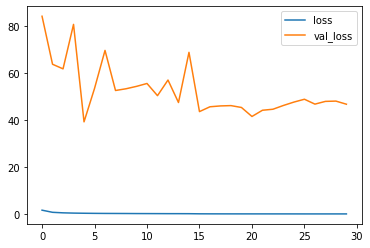

In [21]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

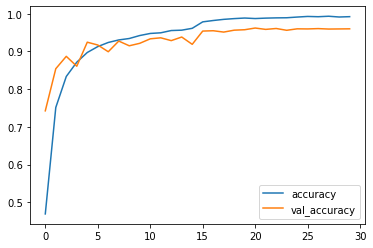

In [22]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

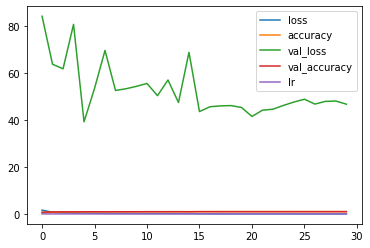

In [23]:
losses.plot()

In [24]:
model.evaluate(X_test,y_test)

105/105 [==============================] - 0s 3ms/step - loss: 46.6828 - accuracy: 0.9598


[46.68283462524414, 0.9598094820976257]